In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('macro_saude.csv')

df

,geocode,name_muni,name_region,code_region,name_macro,code_macro,state
0,1100015,Alta Floresta D'Oeste,Zona da Mata,11005,Cacoal,1101,RO
1,1100023,Ariquemes,Vale do Jamari,11001,Porto Velho,1102,RO
2,1100031,Cabixi,Cone Sul,11006,Cacoal,1101,RO
3,1100049,Cacoal,Café,11002,Cacoal,1101,RO
4,1100056,Cerejeiras,Cone Sul,11006,Cacoal,1101,RO
...,...,...,...,...,...,...,...
5555,5220157,São Luíz do Norte,São Patrício I,52013,Centro-Norte,5209,GO
5556,5220207,São Miguel do Araguaia,Norte,52008,Centro-Norte,5209,GO
5557,5220264,São Miguel do Passa Quatro,Centro Sul,52002,Centro Sudeste,5210,GO
5558,5221403,Trindade,Central,52001,Centro-Oeste,5208,GO


In [4]:
df.geocode.unique().shape[0]

5560

In [6]:
df.code_region.unique().shape[0]

450

In [7]:
df.code_macro.unique().shape[0]

118

Histograma do número de município por regional de saúde:

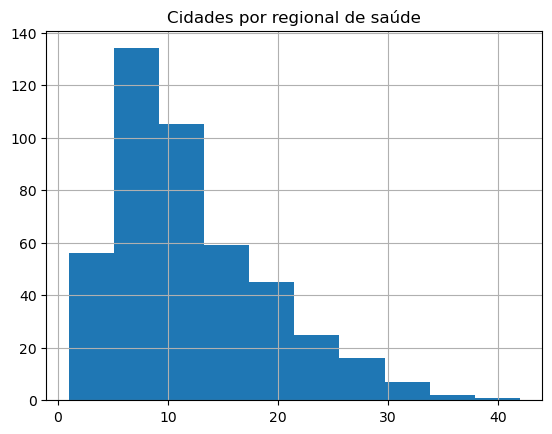

In [30]:

fig,ax = plt.subplots()
df[['code_region', 'geocode']].groupby('code_region').count().hist(ax =ax)

ax.set_title('Cidades por regional de saúde')

plt.show()


In [12]:
df[['code_region', 'geocode']].groupby('code_region').count().sort_values(by = 'geocode')

,geocode
code_region,
53001,1
35016,1
50002,2
31018,3
31022,3
...,...
50003,33
43016,33
50001,34


Olhando para as populações: 

In [14]:
pop = pd.read_csv('./forecast/poptcu2010-2022_rgi.csv', usecols = ['CODMUN7', 'POP22'])

pop.head()

,CODMUN7,POP22
0,1100015,21558
1,1100023,100896
2,1100031,5107
3,1100049,92202
4,1100056,15237


In [17]:
df = df.merge(pop, left_on = 'geocode', right_on = 'CODMUN7')

df.head()

,geocode,name_muni,name_region,code_region,name_macro,code_macro,state,CODMUN7,POP22
0,1100015,Alta Floresta D'Oeste,Zona da Mata,11005,Cacoal,1101,RO,1100015,21558
1,1100023,Ariquemes,Vale do Jamari,11001,Porto Velho,1102,RO,1100023,100896
2,1100031,Cabixi,Cone Sul,11006,Cacoal,1101,RO,1100031,5107
3,1100049,Cacoal,Café,11002,Cacoal,1101,RO,1100049,92202
4,1100056,Cerejeiras,Cone Sul,11006,Cacoal,1101,RO,1100056,15237


In [18]:
df_a = df.loc[df.POP22 > 50000]

df_a.head()

,geocode,name_muni,name_region,code_region,name_macro,code_macro,state,CODMUN7,POP22
1,1100023,Ariquemes,Vale do Jamari,11001,Porto Velho,1102,RO,1100023,100896
3,1100049,Cacoal,Café,11002,Cacoal,1101,RO,1100049,92202
10,1100114,Jaru,Central,11003,Porto Velho,1102,RO,1100114,52090
11,1100122,Ji-Paraná,Central,11003,Porto Velho,1102,RO,1100122,136825
15,1100205,Porto Velho,Madeira-Mamoré,11004,Porto Velho,1102,RO,1100205,461748


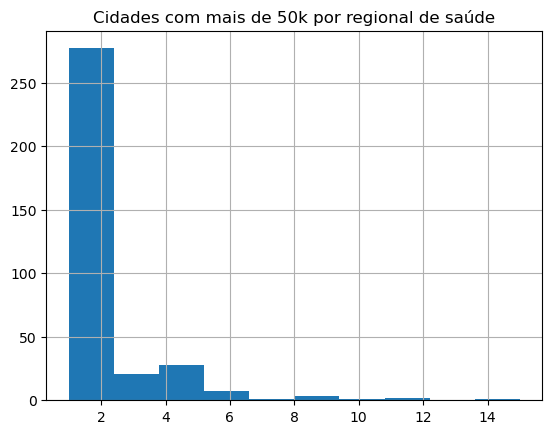

In [27]:
fig,ax = plt.subplots()
df_a[['code_region', 'geocode']].groupby('code_region').count().hist(ax = ax)

ax.set_title('Cidades com mais de 50k por regional de saúde')

plt.show()

In [28]:
df_a[['code_region', 'geocode']].groupby('code_region').count().sort_values(by = 'geocode')

,geocode
code_region,
11001,1
31055,1
31057,1
31059,1
31060,1
...,...
35163,9
41002,10
26010,12


In [23]:
df_b = df.loc[df.POP22 < 50000]

df_b.head()

,geocode,name_muni,name_region,code_region,name_macro,code_macro,state,CODMUN7,POP22
0,1100015,Alta Floresta D'Oeste,Zona da Mata,11005,Cacoal,1101,RO,1100015,21558
2,1100031,Cabixi,Cone Sul,11006,Cacoal,1101,RO,1100031,5107
4,1100056,Cerejeiras,Cone Sul,11006,Cacoal,1101,RO,1100056,15237
5,1100064,Colorado do Oeste,Cone Sul,11006,Cacoal,1101,RO,1100064,15747
6,1100072,Corumbiara,Cone Sul,11006,Cacoal,1101,RO,1100072,7503


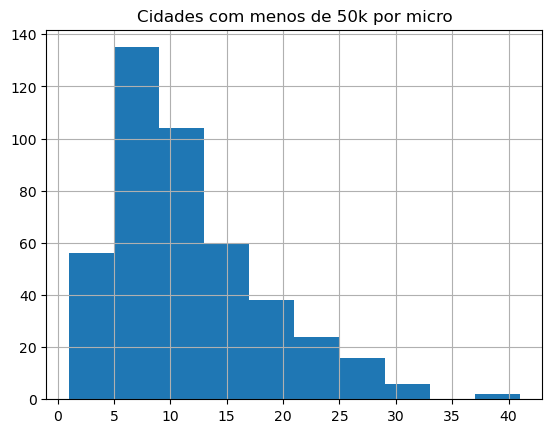

In [24]:
fig,ax = plt.subplots()
df_b[['code_region', 'geocode']].groupby('code_region').count().hist(ax = ax)

ax.set_title('Cidades com menos de 50k por micro')

plt.show()